# Lecture 3 : Introduction to the $k$-center Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
plt.rcParams['figure.figsize'] = [8,6]
plt.rcParams.update({'font.size': 14})

In [2]:
# clone cmda3634_materials repo to download a dataset
!git clone https://code.vt.edu/jasonwil/cmda3634_materials.git

Cloning into 'cmda3634_materials'...
remote: Enumerating objects: 47, done.
remote: Total 47 (delta 0), reused 0 (delta 0), pack-reused 47
Receiving objects: 100% (47/47), 73.44 KiB | 1.79 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [3]:
# copy the cities dataset to our working directory
!cp cmda3634_materials/FSA04/cities128.txt .

# Part 1 : Look at a set of 128 cities that Amazon delivers to.  

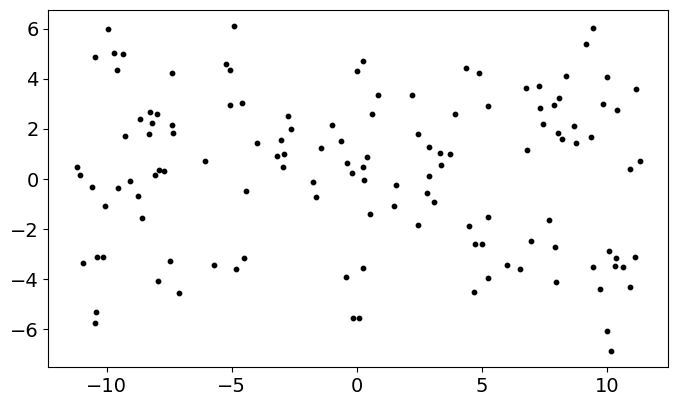

In [8]:
# load the points
data = np.loadtxt("cities128.txt",skiprows=1)

# set the aspect ratio to equal
plt.gca().set_aspect('equal')

# plot the points
plt.scatter (data[:,0],data[:,1],s=10,color='black');

# Part 2 : Compute the cost and visualize a given choice of k centers.  

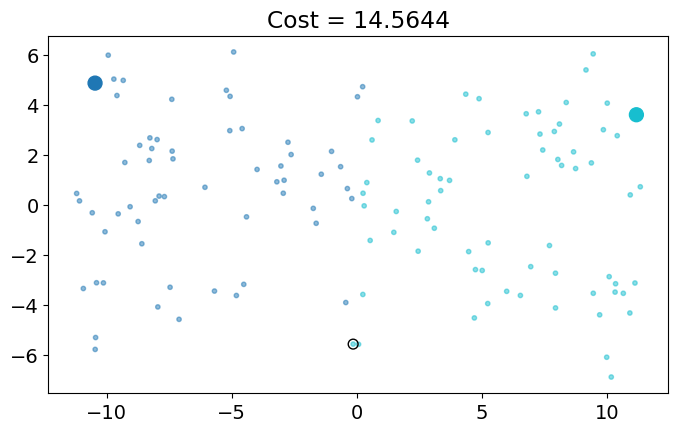

In [9]:
# Enter choice of centers
ctrs = np.array([10,50])

# load the points
data = np.loadtxt("cities128.txt",skiprows=1)

# set the aspect ratio to equal
plt.gca().set_aspect('equal')

# Compute the cost and produce visualization
dist_sq = np.zeros((len(ctrs),len(data)))
for i in range(len(ctrs)):
    dist_sq[i] = np.sum((data-data[ctrs[i]])*(data-data[ctrs[i]]),axis=1)
clu = np.argmin(dist_sq,axis=0)
ex = np.argmax(np.min(dist_sq,axis=0))
cost_sq = np.max(np.min(dist_sq,axis=0))
plt.scatter (data[:,0],data[:,1],c=clu,cmap="tab10",s=10,alpha=0.5)
plt.scatter (data[ctrs,0],data[ctrs,1],c=range(len(ctrs)),cmap="tab10",s=100)
plt.scatter (data[ex,0],data[ex,1],s=50,facecolors='none', edgecolors='black')
plt.title ('Cost = %g' % np.sqrt(cost_sq));

# Part 3 : Use Python to find the optimal solution to the 2-center problem
## Use a brute force approach: try all possible pairs of centers!

## Recall that given a choice of centers $c_1$ and $c_2$, the cost is:

$$\Large{\text{cost}(c_1, c_2) = \max_{1 \leq i \leq n} \min( \| p[i] - p[c_1] \|, \| p[i] - p[c_2] \|)}$$

## Note: We minimize the cost squared instead of the cost to avoid taking square roots.

## There are $128 \choose 2$ $= 8128$ pairs to check.

In [10]:
# calculate the cost squared for centers with indices c1, c2
def calc_cost_sq(data,c1,c2):
    cost_sq = 0;
    n = len(data)
    for i in range(n):
        ds1 = np.inner(data[i]-data[c1],data[i]-data[c1])
        ds2 = np.inner(data[i]-data[c2],data[i]-data[c2])
        min_dist_sq = min([ds1,ds2])
        cost_sq = max([cost_sq,min_dist_sq])
    return cost_sq

# load the points
data = np.loadtxt("cities128.txt",skiprows=1)

# start the timer
tic = time.process_time()

# compute the minimal cost and an optimal solution
n = len(data)
min_cost_sq = float("inf")
tuples_checked = 0;
for c1 in range(0,n-1):
    for c2 in range(c1+1,n):
        tuples_checked += 1
        cost_sq = calc_cost_sq(data,c1,c2)
        if (cost_sq < min_cost_sq):
            min_cost_sq = cost_sq
            optimal_centers = np.array([c1,c2])

# stop the timer
toc = time.process_time()
elapsed = toc-tic

# print the results
print ('number of points =',n)
print ('2-tuples checked =',tuples_checked)
print ('elapsed time =',round(elapsed,2),'seconds')
print ('2-tuples checked per second =',int(tuples_checked/elapsed))
print ('minimum cost =',np.round(np.sqrt(min_cost_sq),2))
print ('optimal centers =',optimal_centers)

number of points = 128
2-tuples checked = 8128
elapsed time = 7.43 seconds
2-tuples checked per second = 1094
minimum cost = 8.5
optimal centers = [12 25]


## Visualize an Optimal Solution to the $2$-center problem.

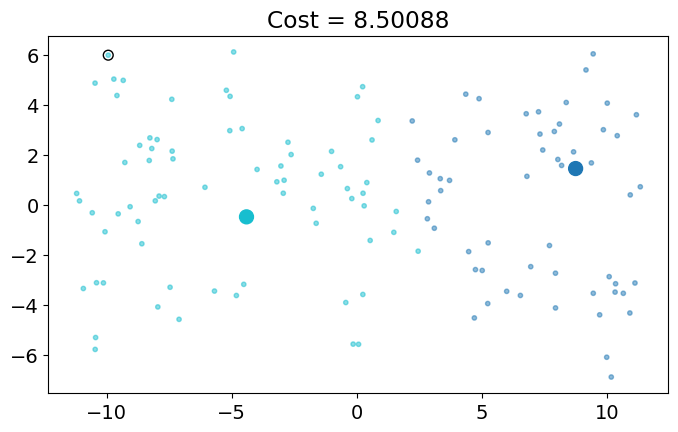

In [11]:
# an optimal solution
ctrs = np.array([12,25])

# load the points
data = np.loadtxt("cities128.txt",skiprows=1)

# set the aspect ratio to equal
plt.gca().set_aspect('equal')

# Compute the cost and produce visualization
dist_sq = np.zeros((len(ctrs),len(data)))
for i in range(len(ctrs)):
    dist_sq[i] = np.sum((data-data[ctrs[i]])*(data-data[ctrs[i]]),axis=1)
clu = np.argmin(dist_sq,axis=0)
ex = np.argmax(np.min(dist_sq,axis=0))
cost_sq = np.max(np.min(dist_sq,axis=0))
plt.scatter (data[:,0],data[:,1],c=clu,cmap="tab10",s=10,alpha=0.5)
plt.scatter (data[ctrs,0],data[ctrs,1],c=range(len(ctrs)),cmap="tab10",s=100)
plt.scatter (data[ex,0],data[ex,1],s=50,facecolors='none', edgecolors='black')
plt.title ('Cost = %g' % np.sqrt(cost_sq));

# Part 4 : Use Python to find the optimal solution to the 3-center problem
## Use a brute force approach: try all possible triples of centers!

## Recall that given a choice of centers $c_1$, $c_2$ and $c_3$ the cost is:

$$\Large{\text{cost}(c_1, c_2, c_3) = \max_{1 \leq i \leq n} \min( \| p[i] - p[c_1] \|, \| p[i] - p[c_2] \|, \| p[i] - p[c_3] \|)}$$

## Note: We minimize the cost squared instead of the cost to avoid taking square roots.

## There are $128 \choose 3$ $= 341376$ triples to check.

In [12]:
# calculate the cost squared for centers with indices c1, c2, c3
def calc_cost_sq(data,c1,c2,c3):
    cost_sq = 0;
    n = len(data)
    for i in range(n):
        ds1 = np.inner(data[i]-data[c1],data[i]-data[c1])
        ds2 = np.inner(data[i]-data[c2],data[i]-data[c2])
        ds3 = np.inner(data[i]-data[c3],data[i]-data[c3])
        min_dist_sq = min([ds1,ds2,ds3])
        cost_sq = max([cost_sq,min_dist_sq])
    return cost_sq

# load the points
data = np.loadtxt("cities128.txt",skiprows=1)

# start the timer
tic = time.process_time()

# compute the minimal cost and an optimal solution
n = len(data)
min_cost_sq = float("inf")
tuples_checked = 0;
for c1 in range(0,n-2):
    for c2 in range(c1+1,n-1):
        for c3 in range(c2+1,n):
            tuples_checked += 1
            cost_sq = calc_cost_sq(data,c1,c2,c3)
            if (cost_sq < min_cost_sq):
                min_cost_sq = cost_sq
                optimal_centers = np.array([c1,c2,c3])

# stop the timer
toc = time.process_time()
elapsed = toc-tic

# print the results
print ('number of points =',n)
print ('3-tuples checked =',tuples_checked)
print ('elapsed time =',round(elapsed,2),'seconds')
print ('3-tuples checked per second =',int(tuples_checked/elapsed))
print ('minimum cost =',np.round(np.sqrt(min_cost_sq),2))
print ('optimal centers =',optimal_centers)

number of points = 128
3-tuples checked = 341376
elapsed time = 494.5 seconds
3-tuples checked per second = 690
minimum cost = 6.64
optimal centers = [  5  44 110]


## Visualize an Optimal Solution to the $3$-center problem.

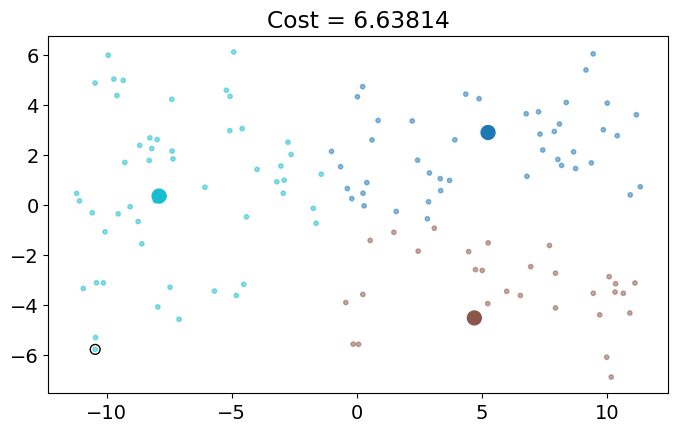

In [13]:
# An optimal solution to the 3-center problem.
ctrs = np.array([5,44,110])

# load the points
data = np.loadtxt("cities128.txt",skiprows=1)

# set the aspect ratio to equal
plt.gca().set_aspect('equal')

# Compute the cost and produce visualization
dist_sq = np.zeros((len(ctrs),len(data)))
for i in range(len(ctrs)):
    dist_sq[i] = np.sum((data-data[ctrs[i]])*(data-data[ctrs[i]]),axis=1)
clu = np.argmin(dist_sq,axis=0)
ex = np.argmax(np.min(dist_sq,axis=0))
cost_sq = np.max(np.min(dist_sq,axis=0))
plt.scatter (data[:,0],data[:,1],c=clu,cmap="tab10",s=10,alpha=0.5)
plt.scatter (data[ctrs,0],data[ctrs,1],c=range(len(ctrs)),cmap="tab10",s=100)
plt.scatter (data[ex,0],data[ex,1],s=50,facecolors='none', edgecolors='black')
plt.title ('Cost = %g' % np.sqrt(cost_sq));